# SymPy example

Some useful SymPy pages:
- [Tutorial page](https://docs.sympy.org/latest/tutorial/index.html)
- [SymPy API](https://docs.sympy.org/latest/modules/index.html)

Parameters would become a mapping of `Symbol`s to initial, suggested values and dynamics would be a mapping of `Symbol`s to 'suggested' expressions. Intensity will be the eventual combined expression.

In [ ]:
# !pip install matplotlib sympy

In [ ]:
from typing import Dict

import attr
import sympy as sy


@attr.s
class AmplitudeModel:
    initial_values: Dict[sy.Symbol, float] = attr.ib(default=dict())
    dynamics: Dict[sy.Symbol, sy.Function] = attr.ib(default=dict())
    intensity: sy.Expr = attr.ib(default=None)

There needs to be one symbol $x$ that represents the four-momentum input:

In [ ]:
x = sy.Symbol("x")

As an example, let's create an `AmplitudeModel` with an `intensity` that is a sum of Gaussians. Each Gaussian here takes the rôle of a dynamics function:

In [ ]:
model = AmplitudeModel()

N_COMPONENTS = 3
for i in range(1, N_COMPONENTS + 1):
    mu = sy.Symbol(fR"\mu_{i}")
    sigma = sy.Symbol(fR"\sigma_{i}")
    model.initial_values.update(
        {
            mu: float(i),
            sigma: 1 / (2 * i),
        }
    )
    gauss = sy.exp(-((x - mu) ** 2) / (sigma ** 2)) / (sigma * sy.sqrt(2* sy.pi))
    dyn_symbol = sy.Symbol(f"\mathrm{{dyn}}_{i}")
    model.dynamics[dyn_symbol] = gauss

coherent_sum = sum(model.dynamics)
model.intensity = coherent_sum

In [ ]:
model.initial_values

{\mu_1: 1.0,
 \sigma_1: 0.5,
 \mu_2: 2.0,
 \sigma_2: 0.25,
 \mu_3: 3.0,
 \sigma_3: 0.16666666666666666}

In [ ]:
model.intensity

\mathrm{dyn}_1 + \mathrm{dyn}_2 + \mathrm{dyn}_3

Dynamics are inserted into the intensity expression of the model:

In [ ]:
model.intensity.subs(model.dynamics)

sqrt(2)*exp(-(-\mu_3 + x)**2/\sigma_3**2)/(2*sqrt(pi)*\sigma_3) + sqrt(2)*exp(-(-\mu_2 + x)**2/\sigma_2**2)/(2*sqrt(pi)*\sigma_2) + sqrt(2)*exp(-(-\mu_1 + x)**2/\sigma_1**2)/(2*sqrt(pi)*\sigma_1)

And, for evaluating, the 'suggested' initial parameter values are inserted:

In [ ]:
model.intensity.subs(model.dynamics).subs(model.initial_values)

1.0*sqrt(2)*exp(-4.0*(x - 1.0)**2)/sqrt(pi) + 2.0*sqrt(2)*exp(-64.0*(0.5*x - 1)**2)/sqrt(pi) + 3.0*sqrt(2)*exp(-324.0*(0.333333333333333*x - 1)**2)/sqrt(pi)

Here's a small helper function to plot this model:

In [ ]:
def plot_model(model: AmplitudeModel) -> None:
    total_plot = sy.plotting.plot(
        model.intensity.subs(model.dynamics).subs(model.initial_values),
        (x, 0, 4),
        show=False,
        line_color="black",
    )
    p1 = sy.plotting.plot(
        model.dynamics[sy.Symbol("\mathrm{dyn}_1")].subs(model.initial_values),
        (x, 0, 4),
        line_color="red",
        show=False,
    )
    p2 = sy.plotting.plot(
        model.dynamics[sy.Symbol("\mathrm{dyn}_2")].subs(model.initial_values),
        (x, 0, 4),
        line_color="blue",
        show=False,
    )
    p3 = sy.plotting.plot(
        model.dynamics[sy.Symbol("\mathrm{dyn}_3")].subs(model.initial_values),
        (x, 0, 4),
        line_color="green",
        show=False,
    )
    total_plot.extend(p1)
    total_plot.extend(p2)
    total_plot.extend(p3)
    total_plot.show()

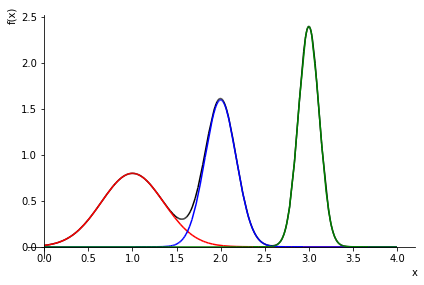

In [ ]:
plot_model(model)

Now we can couple parameters like this:

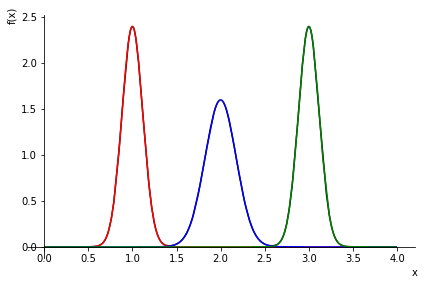

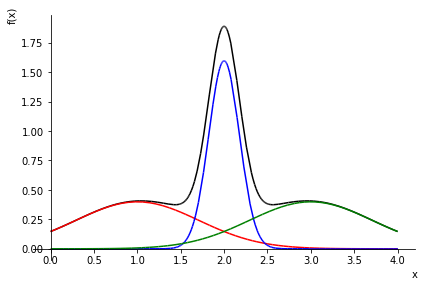

In [ ]:
model.initial_values[sy.Symbol("\sigma_1")] = sy.Symbol("\sigma_3")
plot_model(model)
model.initial_values[sy.Symbol("\sigma_3")] = 1
plot_model(model)

And it's also possible to insert custom dynamics:

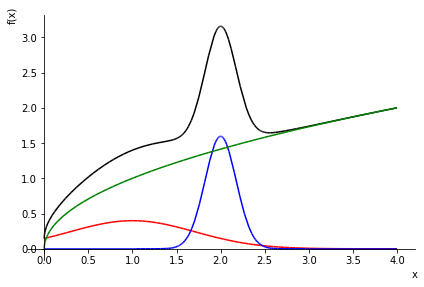

In [ ]:
model.dynamics[sy.Symbol("\mathrm{dyn}_3")] = sy.sqrt(x)
plot_model(model)